In [153]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
merged_final = pickle.load(open("merged_final.pkl", "rb"))

In [154]:
import pandas as pd

# Assuming your DataFrame is named 'merged_final'

# Step 1: Group by 'competition_id', 'season_id', 'team_id'
grouped_data = merged_final.groupby(['competition_id', 'season_id', 'team_id'])

# Step 2: Compute the sum of 'label' and 'probability' and count the rows for each group
agg_data = grouped_data.agg({'label': ['sum', 'count'], 'probability': 'sum', 'match_id': 'count', 
                              'player_id': 'first', 'team': 'first', 
                              'competition_name': 'first', 'season_name': 'first'})

# Step 3: Flatten the multi-level columns
agg_data.columns = agg_data.columns.map('_'.join).str.strip('_')

# Step 4: Compute the ratio of sum of probability to sum of label
agg_data['ratio'] = agg_data['probability_sum'] / agg_data['label_sum']

# Step 5: Sort the DataFrame by the 'ratio' column in descending order
agg_data = agg_data.sort_values(by=['competition_id', 'season_id', 'ratio'], ascending=[True, True, False])


In [163]:
# df = agg_data.loc[(12, 27)]
# [(12, 27),( 2, 27),( 11, 27),( 7, 27),( 9, 27),(1238,108),( 43, 3), ( 43, 106), (55, 43) ]

cid = 43
sid = 106

df = agg_data.loc[(cid, sid)]
len(df)

32

In [181]:
cid = 43
sid = 106

from statsbombpy import sb

matches = sb.matches(cid,sid)

# matches.head()
# print (home_team, away_team) combination
for i in range(len(matches)):
    home_team = matches.iloc[i]['home_team']
    away_team = matches.iloc[i]['away_team']
    print (home_team, away_team)

Serbia Switzerland
Argentina Australia
Australia Denmark
Brazil Serbia
Tunisia Australia
Ecuador Senegal
Netherlands Argentina
Uruguay South Korea
Morocco Portugal
Argentina France
Saudi Arabia Mexico
Poland Argentina
France Denmark
Argentina Mexico
Brazil Switzerland
Netherlands Qatar
Portugal Switzerland
England Senegal
Croatia Morocco
Argentina Croatia
England France
France Morocco
Croatia Brazil
Morocco Spain
Japan Croatia
Brazil South Korea
France Poland
Netherlands United States
Portugal Uruguay
Spain Germany
Cameroon Serbia
Japan Costa Rica
Belgium Morocco
Germany Japan
United States Wales
Qatar Ecuador
Qatar Senegal
Argentina Saudi Arabia
South Korea Ghana
Portugal Ghana
Poland Saudi Arabia
Croatia Belgium
Ghana Uruguay
Costa Rica Germany
Spain Costa Rica
Switzerland Cameroon
Senegal Netherlands
Croatia Canada
Cameroon Brazil
France Australia
Iran United States
Morocco Croatia
Canada Morocco
Tunisia France
Netherlands Ecuador
Wales Iran
England United States
England Iran
Belgiu

/Users/adnanazmat/miniconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [165]:
# make df['team_first'].iloc[0] a string
df['team_first'] = df['team_first'].apply(lambda x: str(x))

# remove first 5 characters from df['team_first'] and remove everything from "Name:" 
df['team_first'] = df['team_first'].apply(lambda x: x[5:])
df['team_first'] = df['team_first'].apply(lambda x: x.split("Name:")[0])

# remove \n from df['team_first']
df['team_first'] = df['team_first'].apply(lambda x: x.replace("\n", ""))

/var/folders/w2/cwqdzbx140l41n8zvm81gvbh0000gn/T/ipykernel_86108/324829612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_first'] = df['team_first'].apply(lambda x: str(x))
/var/folders/w2/cwqdzbx140l41n8zvm81gvbh0000gn/T/ipykernel_86108/324829612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_first'] = df['team_first'].apply(lambda x: x[5:])
/var/folders/w2/cwqdzbx140l41n8zvm81gvbh0000gn/T/ipykernel_86108/324829612.py:6: SettingWithCopyWarning: 
A value is trying to be set on a 

In [166]:
df.head()

,label_sum,label_count,probability_sum,match_id_count,player_id_first,team_first,competition_name_first,season_name_first,ratio
team_id,,,,,,,,,
788,7,28,10.425293,28,23774,Morocco,FIFA World Cup,2022,1.489328
779,9,24,11.112382,24,19597,Argentina,FIFA World Cup,2022,1.234709
797,4,14,4.931209,14,5235,Iran,FIFA World Cup,2022,1.232802
1839,5,12,5.985026,12,21881,United States,FIFA World Cup,2022,1.197005
772,2,4,2.315978,4,4353,Spain,FIFA World Cup,2022,1.157989


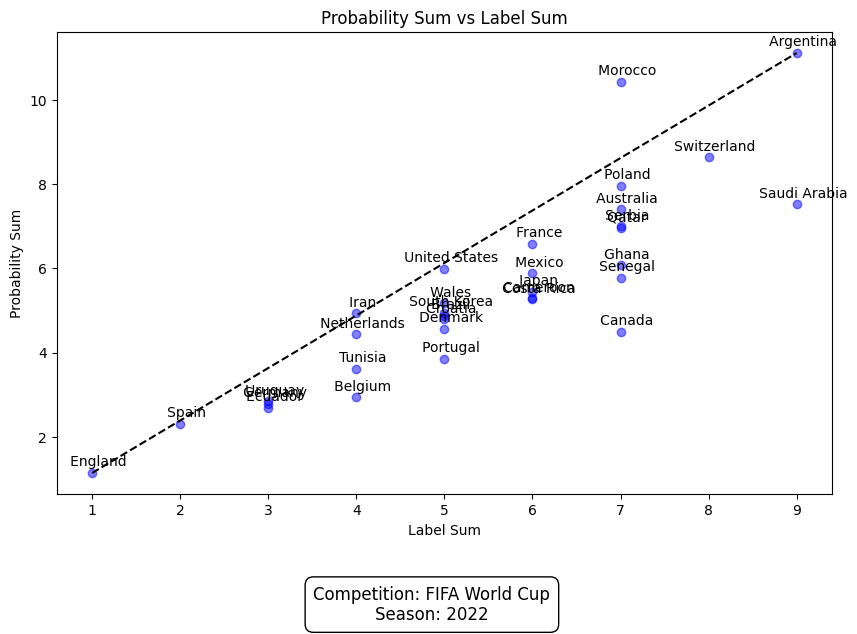

In [167]:
# probability_sum vs. label_sum plot

# Extracting relevant columns
probability_sum = df['probability_sum']
label_sum = df['label_sum']
team_names = df.index.map(df['team_first']).tolist()  # Map team IDs to country names
competition_name = df['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df['season_name_first'].iloc[0] # Assuming the season name is the same for all rows

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_sum, probability_sum, color='blue', alpha=0.5)

# Adding a diagonal line
ax.plot([label_sum.min(), label_sum.max()], [probability_sum.min(), probability_sum.max()], linestyle='--', color='black', label='Diagonal line')

# Annotating each point with the team name
for i, team_name in enumerate(team_names):
    ax.annotate(team_name, (label_sum.iloc[i], probability_sum.iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Adding competition name and season name as captions
caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

ax.set_title('Probability Sum vs Label Sum')
ax.set_xlabel('Label Sum')
ax.set_ylabel('Probability Sum')
plt.show()

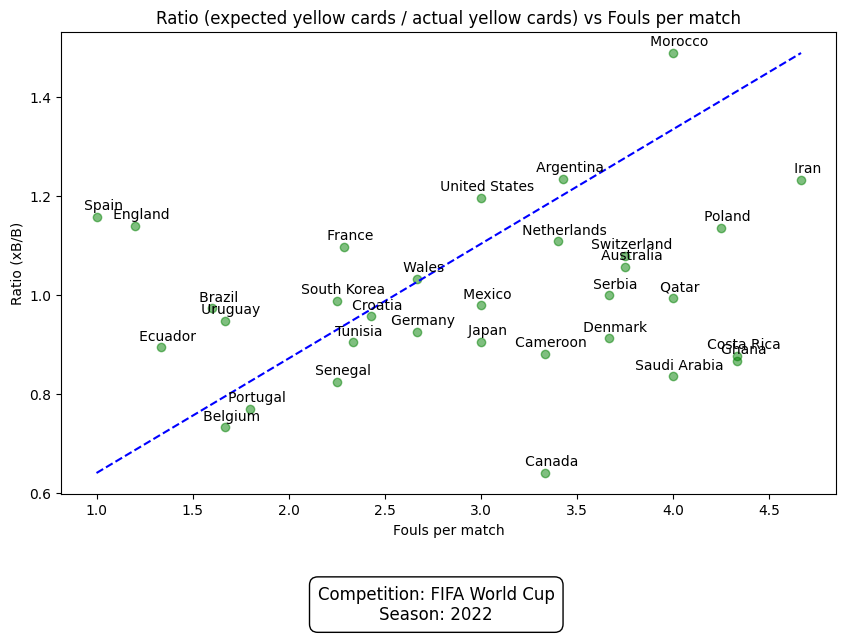

In [205]:
# Ratio Vs. Label Count Plot

# Extracting relevant columns
label_count = df['label_count'] / df['match_count']
ratio = df['ratio']
team_names = df.index.map(df['team_first']).tolist()  # Map team IDs to country names
competition_name = df['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df['season_name_first'].iloc[0]

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_count, ratio, color='green', alpha=0.5)

# Adding a diagonal line
ax.plot([label_count.min(), label_count.max()], [ratio.min(), ratio.max()], linestyle='--', color='blue', label='Diagonal line')

# Annotating each point with the team name
for i, team_name in enumerate(team_names):
    ax.annotate(team_name, (label_count.iloc[i], ratio.iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Adding competition name and season name as captions
caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

ax.set_title('Ratio (expected yellow cards / actual yellow cards) vs Fouls per match')
ax.set_xlabel('Fouls per match')
ax.set_ylabel('Ratio (xB/B)')
plt.show()


In [320]:
df.head()

,label_sum,label_count,probability_sum,match_id_count,player_id_first,team_first,competition_name_first,season_name_first,ratio,team,match_count
team_id,,,,,,,,,,,
788,7,28,10.425293,28,23774,Morocco,FIFA World Cup,2022,1.489328,Morocco,7
779,9,24,11.112382,24,19597,Argentina,FIFA World Cup,2022,1.234709,Argentina,7
797,4,14,4.931209,14,5235,Iran,FIFA World Cup,2022,1.232802,Iran,3
1839,5,12,5.985026,12,21881,United States,FIFA World Cup,2022,1.197005,UnitedStates,4
772,2,4,2.315978,4,4353,Spain,FIFA World Cup,2022,1.157989,Spain,4


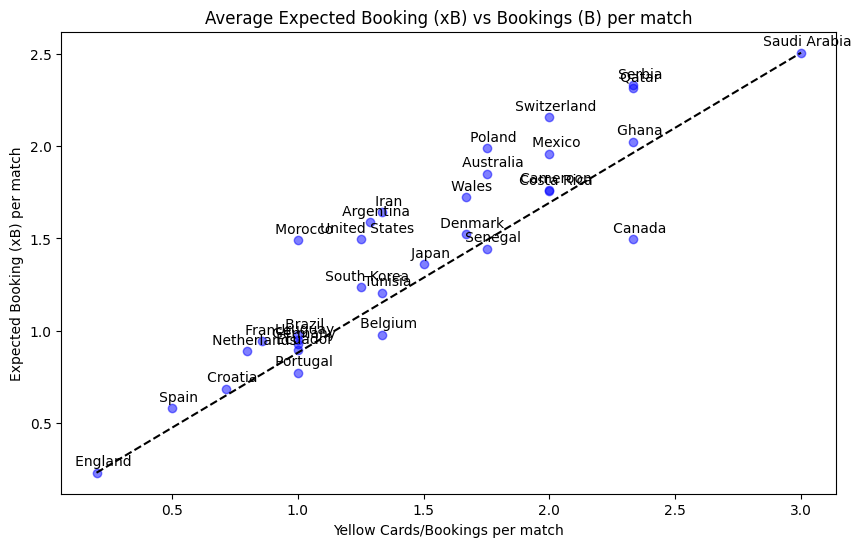

In [321]:
# probability_sum vs. label_sum plot

# Extracting relevant columns
probability_sum = df['probability_sum'] / df['match_count']
label_sum = df['label_sum'] / df['match_count']

team_names = df.index.map(df['team_first']).tolist()  # Map team IDs to country names
competition_name = df['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df['season_name_first'].iloc[0] # Assuming the season name is the same for all rows

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_sum, probability_sum, color='blue', alpha=0.5)

# Adding a diagonal line
ax.plot([label_sum.min(), label_sum.max()], [probability_sum.min(), probability_sum.max()], linestyle='--', color='black', label='Diagonal line')

# Annotating each point with the team name
for i, team_name in enumerate(team_names):
    ax.annotate(team_name, (label_sum.iloc[i], probability_sum.iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Adding competition name and season name as captions
# caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
# fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

ax.set_title('Average Expected Booking (xB) vs Bookings (B) per match')
ax.set_xlabel('Yellow Cards/Bookings per match')
ax.set_ylabel('Expected Booking (xB) per match')
plt.show()

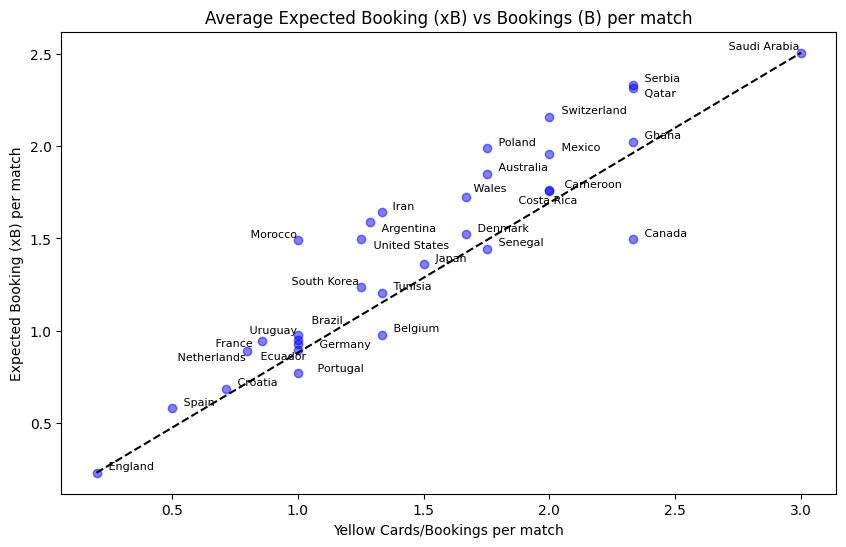

In [327]:
# Import the adjustText library
from adjustText import adjust_text

# Ratio Vs. Label Count Plot

# Extracting relevant columns
probability_sum = df['probability_sum'] / df['match_count']
label_sum = df['label_sum'] / df['match_count']

team_names = df.index.map(df['team_first']).tolist()  # Map team IDs to country names
competition_name = df['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df['season_name_first'].iloc[0] # Assuming the season name is the same for all rows

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_sum, probability_sum, color='blue', alpha=0.5)

# Adding a diagonal line
ax.plot([label_sum.min(), label_sum.max()], [probability_sum.min(), probability_sum.max()], linestyle='--', color='black', label='Diagonal line')

# Annotating each point with the team name
texts = []
for i, team_name in enumerate(team_names):
    if df['match_count'].iloc[i] >= 0:  # Only annotate teams that have played 3 or more matches
        texts.append(ax.text(label_sum.iloc[i], probability_sum.iloc[i], team_name, fontsize=8))  # Adjust fontsize here

# Use adjustText to reduce overlapping of text
adjust_text(texts)

# Adding competition name and season name as captions
# caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
# fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

ax.set_title('Average Expected Booking (xB) vs Bookings (B) per match')
ax.set_xlabel('Yellow Cards/Bookings per match')
ax.set_ylabel('Expected Booking (xB) per match')
plt.show()


In [170]:
df['team_first']

team_id
788              Morocco
779            Argentina
797                 Iran
1839       United States
772                Spain
768              England
789               Poland
941          Netherlands
771               France
773          Switzerland
792            Australia
907                Wales
786               Serbia
3566               Qatar
791          South Korea
794               Mexico
781               Brazil
785              Croatia
783              Uruguay
770              Germany
776              Denmark
778                Japan
777              Tunisia
3565             Ecuador
2722            Cameroon
795           Costa Rica
4885               Ghana
799         Saudi Arabia
787              Senegal
780             Portugal
782              Belgium
1833              Canada
Name: team_first, dtype: object

In [173]:
df.head(32)

,label_sum,label_count,probability_sum,match_id_count,player_id_first,team_first,competition_name_first,season_name_first,ratio
team_id,,,,,,,,,
788,7,28,10.425293,28,23774,Morocco,FIFA World Cup,2022,1.489328
779,9,24,11.112382,24,19597,Argentina,FIFA World Cup,2022,1.234709
797,4,14,4.931209,14,5235,Iran,FIFA World Cup,2022,1.232802
1839,5,12,5.985026,12,21881,United States,FIFA World Cup,2022,1.197005
772,2,4,2.315978,4,4353,Spain,FIFA World Cup,2022,1.157989
768,1,6,1.140764,6,3336,England,FIFA World Cup,2022,1.140764
789,7,17,7.955665,17,11737,Poland,FIFA World Cup,2022,1.136524
941,4,17,4.436334,17,2988,Netherlands,FIFA World Cup,2022,1.109084
771,6,16,6.585887,16,5477,France,FIFA World Cup,2022,1.097648


In [172]:
len(df)

32

In [183]:
all = """
Serbia Switzerland
Argentina Australia
Australia Denmark
Brazil Serbia
Tunisia Australia
Ecuador Senegal
Netherlands Argentina
Uruguay SouthKorea
Morocco Portugal
Argentina France
SaudiArabia Mexico
Poland Argentina
France Denmark
Argentina Mexico
Brazil Switzerland
Netherlands Qatar
Portugal Switzerland
England Senegal
Croatia Morocco
Argentina Croatia
England France
France Morocco
Croatia Brazil
Morocco Spain
Japan Croatia
Brazil SouthKorea
France Poland
Netherlands UnitedStates
Portugal Uruguay
Spain Germany
Cameroon Serbia
Japan CostaRica
Belgium Morocco
Germany Japan
UnitedStates Wales
Qatar Ecuador
Qatar Senegal
Argentina SaudiArabia
SouthKorea Ghana
Portugal Ghana
Poland SaudiArabia
Croatia Belgium
Ghana Uruguay
CostaRica Germany
Spain CostaRica
Switzerland Cameroon
Senegal Netherlands
Croatia Canada
Cameroon Brazil
France Australia
Iran UnitedStates
Morocco Croatia
Canada Morocco
Tunisia France
Netherlands Ecuador
Wales Iran
England UnitedStates
England Iran
Belgium Canada
Mexico Poland
SouthKorea Portugal
Wales England
Japan Spain
Denmark Tunisia
"""

# print count of each team
import re
from collections import Counter
teams = re.findall(r'\w+', all)
print(Counter(teams))

Counter({'Argentina': 7, 'Morocco': 7, 'France': 7, 'Croatia': 7, 'Brazil': 5, 'Netherlands': 5, 'Portugal': 5, 'England': 5, 'Switzerland': 4, 'Australia': 4, 'Senegal': 4, 'SouthKorea': 4, 'Poland': 4, 'Spain': 4, 'Japan': 4, 'UnitedStates': 4, 'Serbia': 3, 'Denmark': 3, 'Tunisia': 3, 'Ecuador': 3, 'Uruguay': 3, 'SaudiArabia': 3, 'Mexico': 3, 'Qatar': 3, 'Germany': 3, 'Cameroon': 3, 'CostaRica': 3, 'Belgium': 3, 'Wales': 3, 'Ghana': 3, 'Canada': 3, 'Iran': 3})


In [184]:
# {'Argentina': 7, 'Morocco': 7, 'France': 7, 'Croatia': 7, 'Brazil': 5, 'Netherlands': 5, 'Portugal': 5, 'England': 5, 'Switzerland': 4, 'Australia': 4, 'Senegal': 4, 'SouthKorea': 4, 'Poland': 4, 'Spain': 4, 'Japan': 4, 'UnitedStates': 4, 'Serbia': 3, 'Denmark': 3, 'Tunisia': 3, 'Ecuador': 3, 'Uruguay': 3, 'SaudiArabia': 3, 'Mexico': 3, 'Qatar': 3, 'Germany': 3, 'Cameroon': 3, 'CostaRica': 3, 'Belgium': 3, 'Wales': 3, 'Ghana': 3, 'Canada': 3, 'Iran': 3}

In [187]:
# add column team to df which is team_first but with spaces removed
df['team'] = df['team_first'].apply(lambda x: x.replace(" ", ""))

# now add match_count column to df. Use {'Argentina': 7, 'Morocco': 7, 'France': 7, 'Croatia': 7, 'Brazil': 5, 'Netherlands': 5, 'Portugal': 5, 'England': 5, 'Switzerland': 4, 'Australia': 4, 'Senegal': 4, 'SouthKorea': 4, 'Poland': 4, 'Spain': 4, 'Japan': 4, 'UnitedStates': 4, 'Serbia': 3, 'Denmark': 3, 'Tunisia': 3, 'Ecuador': 3, 'Uruguay': 3, 'SaudiArabia': 3, 'Mexico': 3, 'Qatar': 3, 'Germany': 3, 'Cameroon': 3, 'CostaRica': 3, 'Belgium': 3, 'Wales': 3, 'Ghana': 3, 'Canada': 3, 'Iran': 3} to get match_count for each team
df['match_count'] = df['team'].map(Counter(teams))

/var/folders/w2/cwqdzbx140l41n8zvm81gvbh0000gn/T/ipykernel_86108/3579095910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team'] = df['team_first'].apply(lambda x: x.replace(" ", ""))
/var/folders/w2/cwqdzbx140l41n8zvm81gvbh0000gn/T/ipykernel_86108/3579095910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['match_count'] = df['team'].map(Counter(teams))


In [188]:
df.head(32)

,label_sum,label_count,probability_sum,match_id_count,player_id_first,team_first,competition_name_first,season_name_first,ratio,team,match_count
team_id,,,,,,,,,,,
788,7,28,10.425293,28,23774,Morocco,FIFA World Cup,2022,1.489328,Morocco,7
779,9,24,11.112382,24,19597,Argentina,FIFA World Cup,2022,1.234709,Argentina,7
797,4,14,4.931209,14,5235,Iran,FIFA World Cup,2022,1.232802,Iran,3
1839,5,12,5.985026,12,21881,United States,FIFA World Cup,2022,1.197005,UnitedStates,4
772,2,4,2.315978,4,4353,Spain,FIFA World Cup,2022,1.157989,Spain,4
768,1,6,1.140764,6,3336,England,FIFA World Cup,2022,1.140764,England,5
789,7,17,7.955665,17,11737,Poland,FIFA World Cup,2022,1.136524,Poland,4
941,4,17,4.436334,17,2988,Netherlands,FIFA World Cup,2022,1.109084,Netherlands,5
771,6,16,6.585887,16,5477,France,FIFA World Cup,2022,1.097648,France,7


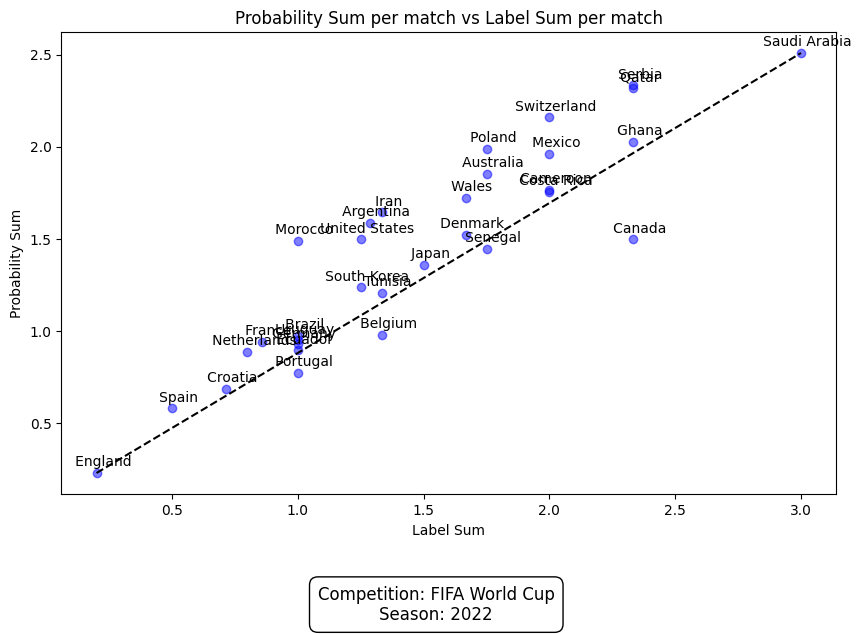

In [196]:
# probability_sum vs. label_sum plot

# Extracting relevant columns
probability_sum = df['probability_sum'] / df['match_count']
label_sum = df['label_sum'] / df['match_count']

team_names = df.index.map(df['team_first']).tolist()  # Map team IDs to country names
competition_name = df['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df['season_name_first'].iloc[0] # Assuming the season name is the same for all rows

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_sum, probability_sum, color='blue', alpha=0.5)

# Adding a diagonal line
ax.plot([label_sum.min(), label_sum.max()], [probability_sum.min(), probability_sum.max()], linestyle='--', color='black', label='Diagonal line')

# Annotating each point with the team name
for i, team_name in enumerate(team_names):
    ax.annotate(team_name, (label_sum.iloc[i], probability_sum.iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Adding competition name and season name as captions
caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

ax.set_title('Probability Sum per match vs Label Sum per match')
ax.set_xlabel('Label Sum')
ax.set_ylabel('Probability Sum')
plt.show()

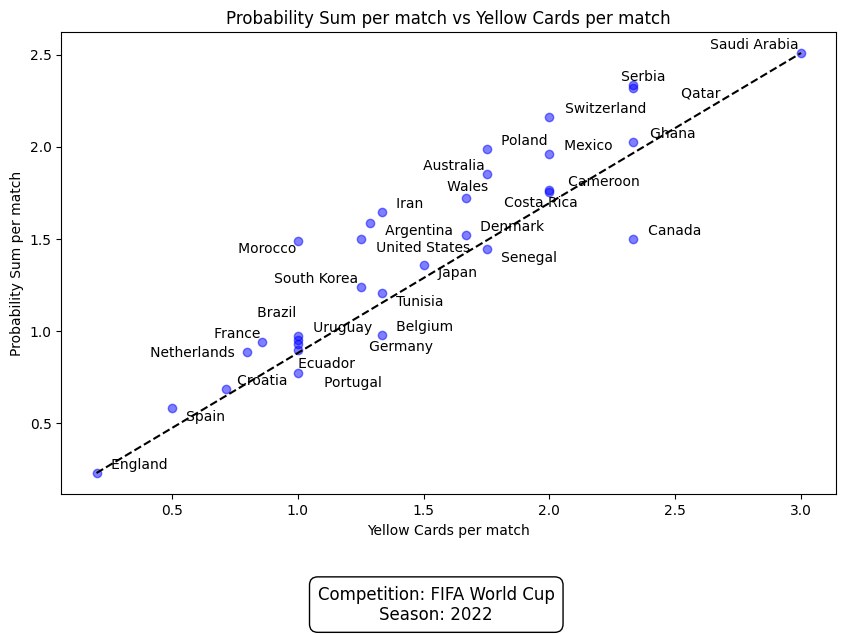

In [198]:
# Importing the library
from adjustText import adjust_text

# probability_sum vs. label_sum plot

# Extracting relevant columns
probability_sum = df['probability_sum'] / df['match_count']
label_sum = df['label_sum'] / df['match_count']

team_names = df.index.map(df['team_first']).tolist()  # Map team IDs to country names
competition_name = df['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df['season_name_first'].iloc[0] # Assuming the season name is the same for all rows

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_sum, probability_sum, color='blue', alpha=0.5)

# Adding a diagonal line
ax.plot([label_sum.min(), label_sum.max()], [probability_sum.min(), probability_sum.max()], linestyle='--', color='black', label='Diagonal line')

# Annotating each point with the team name
texts = []
for i, team_name in enumerate(team_names):
    texts.append(ax.text(label_sum.iloc[i], probability_sum.iloc[i], team_name))

# Using adjust_text to prevent overlapping
adjust_text(texts)

# Adding competition name and season name as captions
caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

ax.set_title('Probability Sum per match vs Yellow Cards per match')
ax.set_xlabel('Yellow Cards per match')
ax.set_ylabel('Probability Sum per match')
plt.show()


In [209]:
import pandas as pd

# Assuming your DataFrame is named 'merged_final'

# Step 1: Group by 'competition_id', 'season_id', 'team_id'
grouped_data = merged_final.groupby(['competition_id', 'season_id', 'player_id'])

# Step 2: Compute the sum of 'label' and 'probability' and count the rows for each group
agg_data = grouped_data.agg({'label': ['sum', 'count'], 'probability': 'sum', 'match_id': 'count', 
                              'team_id': 'first', 'player': 'first', 'team': 'first',
                              'competition_name': 'first', 'season_name': 'first'})

# Step 3: Flatten the multi-level columns
agg_data.columns = agg_data.columns.map('_'.join).str.strip('_')

# Step 4: Compute the ratio of sum of probability to sum of label
agg_data['ratio'] = agg_data['probability_sum'] / agg_data['label_sum']

# Step 5: Sort the DataFrame by the 'ratio' column in descending order
agg_data = agg_data.sort_values(by=['competition_id', 'season_id', 'ratio'], ascending=[True, True, False])


In [210]:
# df = agg_data.loc[(12, 27)]
# [(12, 27),( 2, 27),( 11, 27),( 7, 27),( 9, 27),(1238,108),( 43, 3), ( 43, 106), (55, 43) ]

cid = 43
sid = 106

df2 = agg_data.loc[(cid, sid)]
len(df2)

253

In [211]:
df2.head()

,label_sum,label_count,probability_sum,match_id_count,team_id_first,player_first,team_first,competition_name_first,season_name_first,ratio
player_id,,,,,,,,,,
2988,0,3,0.294162,3,941,"3844 Memphis Depay Name: player, dtype: object","3844 Netherlands Name: team, dtype: object",FIFA World Cup,2022,inf
2989,0,1,0.005398,1,4885,"3362 Alexander Djiku Name: player, dtype: o...","3362 Ghana Name: team, dtype: object",FIFA World Cup,2022,inf
3009,0,4,0.613622,4,771,"3442 Kylian Mbappé Lottin Name: player, dty...","3442 France Name: team, dtype: object",FIFA World Cup,2022,inf
3043,0,2,0.057183,2,776,3421 Christian Dannemann Eriksen Name: play...,"3421 Denmark Name: team, dtype: object",FIFA World Cup,2022,inf
3090,0,1,0.213331,1,779,"3720 Nicolás Hernán Otamendi Name: player, ...","3720 Argentina Name: team, dtype: object",FIFA World Cup,2022,inf


In [328]:
df2.columns

Index(['label_sum', 'label_count', 'probability_sum', 'match_id_count',
       'team_id_first', 'player_first', 'team_first', 'competition_name_first',
       'season_name_first', 'ratio'],
      dtype='object')

In [334]:
# in df2 make a table of xB per 90 vs B per 90
df_merged_minutes['xB per 90'] = df_merged_minutes['probability_sum'] / df_merged_minutes['minutes_played']
df_merged_minutes['B per 90'] = df_merged_minutes['label_sum'] / df_merged_minutes['minutes_played']

# Show xB per 90 and B per 90 for each player in a table. Sort in descending order of xB per 90 - B per 90. Minutes played must be greater than 90. Ratio should be greater than 1.0 but not infinite
df_merged_minutes.loc[(df_merged_minutes['minutes_played'] > 90) & (df_merged_minutes['ratio'] > 1.0) & (df_merged_minutes['ratio'] < 1000000)].sort_values(by=['xB per 90', 'B per 90'], ascending=[False, False])

,label_sum,label_count,probability_sum,match_id_count,team_id_first,player_first,team_first,competition_name_first,season_name_first,ratio,minutes_played,xB per 90,B per 90
102,1,2,1.419855,2,941,Matthijs de Ligt,"3011 Netherlands Name: team, dtype: object",FIFA World Cup,2022,1.419855,91.0,0.015603,0.010989
105,3,5,3.783627,5,779,Marcos Javier Acuña,"3978 Argentina Name: team, dtype: object",FIFA World Cup,2022,1.261209,373.0,0.010144,0.008043
108,2,4,2.424910,4,791,Woo-Young Jung,"3808 South Korea Name: team, dtype: object",FIFA World Cup,2022,1.212455,303.0,0.008003,0.006601
111,1,2,1.121530,2,794,Héctor Miguel Herrera López,"3041 Mexico Name: team, dtype: object",FIFA World Cup,2022,1.121530,160.0,0.007010,0.006250
112,1,2,1.098716,2,770,Leon Goretzka,"3379 Germany Name: team, dtype: object",FIFA World Cup,2022,1.098716,159.0,0.006910,0.006289
109,1,2,1.186712,2,788,Abdelhamid Sabiri,"3354 Morocco Name: team, dtype: object",FIFA World Cup,2022,1.186712,181.0,0.006556,0.005525
99,1,3,1.433711,3,786,Saša Lukić,"3068 Serbia Name: team, dtype: object",FIFA World Cup,2022,1.433711,245.0,0.005852,0.004082
100,1,2,1.425636,2,792,Mitchell Thomas Duke,"3362 Australia Name: team, dtype: object",FIFA World Cup,2022,1.425636,270.0,0.005280,0.003704
97,1,4,1.692051,4,789,Grzegorz Krychowiak,"3883 Poland Name: team, dtype: object",FIFA World Cup,2022,1.692051,332.0,0.005097,0.003012
98,1,3,1.482409,3,773,Manuel Obafemi Akanji,"3310 Switzerland Name: team, dtype: object",FIFA World Cup,2022,1.482409,360.0,0.004118,0.002778


In [342]:
# Show xB per 90 and B per 90 for each player in a table. Sort in descending order of ratio of xB per 90 to B per 90. Minutes played must be greater than 45. Ratio should be greater than 0.85 but not infinite. Label sum must be greater than 1.
df_merged_minutes.loc[(df_merged_minutes['minutes_played'] > 45) & (df_merged_minutes['ratio'] > 0.85) & (df_merged_minutes['ratio'] < 1000000) & (df_merged_minutes['label_sum'] > 1)].sort_values(by=['ratio'], ascending=[False])

# make a table of 'player_first', 'Expected Booking', 'Actual Booking', 'Ratio'
df_filtered = df_merged_minutes.loc[(df_merged_minutes['minutes_played'] > 45) & (df_merged_minutes['ratio'] > 0.85) & (df_merged_minutes['ratio'] < 1000000) & (df_merged_minutes['label_sum'] > 1)].sort_values(by=['ratio'], ascending=[False])[['player_first', 'probability_sum', 'label_sum', 'ratio']].reset_index(drop=True)

df_filtered.head(32)


,player_first,probability_sum,label_sum,ratio
0,Marcos Javier Acuña,3.783627,3,1.261209
1,Woo-Young Jung,2.424910,2,1.212455
2,Fabian Lukas Schär,1.872235,2,0.936117
3,Nemanja Gudelj,1.870675,2,0.935338
4,Matty Cash,1.869860,2,0.934930
5,Jackson Irvine,1.855708,2,0.927854
6,Miloš Degenek,1.787380,2,0.893690
7,Ngoran Suiru Fai Collins,1.772031,2,0.886015


In [346]:
# Make df_filtered column names: 'Player', 'xB', 'B', 'Ratio'. xB and ratio should be rounded to 2 decimal places.
df_filtered.columns = ['Player', 'xB', 'B', 'Ratio']
df_filtered['xB'] = df_filtered['xB'].round(2)
df_filtered['Ratio'] = df_filtered['Ratio'].round(2)

In [348]:
# df_filtered.head() without index
df_filtered.to_string(index=False)

'                  Player   xB  B  Ratio\n     Marcos Javier Acuña 3.78  3   1.26\n          Woo-Young Jung 2.42  2   1.21\n      Fabian Lukas Schär 1.87  2   0.94\n          Nemanja Gudelj 1.87  2   0.94\n              Matty Cash 1.87  2   0.93\n          Jackson Irvine 1.86  2   0.93\n           Miloš Degenek 1.79  2   0.89\nNgoran Suiru Fai Collins 1.77  2   0.89'

In [341]:
df_merged_minutes.loc[(df_merged_minutes['minutes_played'] > 45) & (df_merged_minutes['ratio'] > 0.85) & (df_merged_minutes['ratio'] < 1000000) & (df_merged_minutes['label_sum'] > 1)].sort_values(by=['ratio'], ascending=[False])[['player_first', 'probability_sum', 'label_sum', 'ratio']].head()

,player_first,probability_sum,label_sum,ratio
105,Marcos Javier Acuña,3.783627,3,1.261209
108,Woo-Young Jung,2.424910,2,1.212455
148,Fabian Lukas Schär,1.872235,2,0.936117
149,Nemanja Gudelj,1.870675,2,0.935338
150,Matty Cash,1.869860,2,0.934930


In [349]:
latex_table = df_filtered.to_latex(index=False)
print(latex_table)

\begin{tabular}{lrrr}
\toprule
Player & xB & B & Ratio \\
\midrule
Marcos Javier Acuña & 3.780000 & 3 & 1.260000 \\
Woo-Young Jung & 2.420000 & 2 & 1.210000 \\
Fabian Lukas Schär & 1.870000 & 2 & 0.940000 \\
Nemanja Gudelj & 1.870000 & 2 & 0.940000 \\
Matty Cash & 1.870000 & 2 & 0.930000 \\
Jackson Irvine & 1.860000 & 2 & 0.930000 \\
Miloš Degenek & 1.790000 & 2 & 0.890000 \\
Ngoran Suiru Fai Collins & 1.770000 & 2 & 0.890000 \\
\bottomrule
\end{tabular}



In [218]:
# make df['team_first'].iloc[0] a string
df2['player_first'] = df2['player_first'].apply(lambda x: str(x))

# remove first 5 characters from df['team_first'] and remove everything from "Name:" 
df2['player_first'] = df2['player_first'].apply(lambda x: x[5:])
df2['player_first'] = df2['player_first'].apply(lambda x: x.split("Name:")[0])

# remove \n from df['team_first']
df2['player_first'] = df2['player_first'].apply(lambda x: x.replace("\n", ""))

/var/folders/w2/cwqdzbx140l41n8zvm81gvbh0000gn/T/ipykernel_86108/569121554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['player_first'] = df2['player_first'].apply(lambda x: str(x))
/var/folders/w2/cwqdzbx140l41n8zvm81gvbh0000gn/T/ipykernel_86108/569121554.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['player_first'] = df2['player_first'].apply(lambda x: x[5:])
/var/folders/w2/cwqdzbx140l41n8zvm81gvbh0000gn/T/ipykernel_86108/569121554.py:6: SettingWithCopyWarning: 
A value is trying to 

In [219]:
df2.head()

,label_sum,label_count,probability_sum,match_id_count,team_id_first,player_first,team_first,competition_name_first,season_name_first,ratio
player_id,,,,,,,,,,
2988,0,3,0.294162,3,941,Memphis Depay,"3844 Netherlands Name: team, dtype: object",FIFA World Cup,2022,inf
2989,0,1,0.005398,1,4885,Alexander Djiku,"3362 Ghana Name: team, dtype: object",FIFA World Cup,2022,inf
3009,0,4,0.613622,4,771,Kylian Mbappé Lottin,"3442 France Name: team, dtype: object",FIFA World Cup,2022,inf
3043,0,2,0.057183,2,776,Christian Dannemann Eriksen,"3421 Denmark Name: team, dtype: object",FIFA World Cup,2022,inf
3090,0,1,0.213331,1,779,Nicolás Hernán Otamendi,"3720 Argentina Name: team, dtype: object",FIFA World Cup,2022,inf


862

In [244]:
path_csv = "/Users/adnanazmat/Downloads/convertcsv.csv"
# read path_csv and first row is not header and no index column
df_csv = pd.read_csv(path_csv, header=None, index_col=False)

# make df_csv[0] a list
df_csv_list = df_csv[0].tolist()

In [274]:
df_csv.head()

,0,1
0,Joško Gvardiol,690
1,Dominik Livaković,690
2,Emiliano Martínez,690
3,Lionel Messi,690
4,Nicolás Otamendi,690


In [245]:
len(df_csv)

680

In [246]:
# show df2['player_first'] as a list
df2_list = df2['player_first'].tolist()

# trim each element in df2_list
df2_list_trimmed = [x.strip() for x in df2_list]

In [247]:
df2_list_trimmed

['Memphis Depay',
 'Alexander Djiku',
 'Kylian Mbappé Lottin',
 'Christian Dannemann Eriksen',
 'Nicolás Hernán Otamendi',
 'Bernardo Mota Veiga de Carvalho e Silva',
 'Wahbi Khazri',
 'John Stones',
 'Richarlison de Andrade',
 'Kieran Trippier',
 'Daley Blind',
 'Nikola Vlašić',
 'Marko Grujić',
 'Jordan Brian Henderson',
 'Olivier Giroud',
 'Ellyes Joris Skhiri',
 'Philip Foden',
 'Antonee Robinson',
 'William Silva de Carvalho',
 'Roozbeh Cheshmi',
 'Sardar Azmoun',
 'Ramin Rezaeian',
 'Saman Ghoddos',
 'Achraf Hakimi Mouh',
 'Guillermo Varela Olivera',
 'Luka Modrić',
 'Ivan Perišić',
 'Lionel Andrés Messi Cuccittini',
 'Nicolás Alejandro Tagliafico',
 'Thomas Delaney',
 'Raúl Alonso Jiménez Rodríguez',
 'Axel Witsel',
 'Robert Lewandowski',
 'Wojciech Szczęsny',
 'Milad Mohammadi',
 'Bryan Oviedo',
 'Yeltsin Ignacio Tejeda Valverde',
 'Youssef En-Nesyri',
 'Kendall Jamaal Waston Manley',
 'Remo Freuler',
 'Jawad El Yamiq',
 'Enzo Ebosse',
 'Rodrigo Javier De Paul',
 'Mason Mount',

In [248]:
len(df2_list_trimmed)

253

In [249]:
len(df_csv_list)

680

ERROR: Could not find a version that satisfies the requirement difflib (from versions: none)
ERROR: No matching distribution found for difflib


In [252]:
import difflib

def find_best_match(A1, A2):
    matches = {}
    for name in A2:
        best_match = difflib.get_close_matches(name, A1, n=1)
        if best_match:
            matches[name] = best_match[0]
        else:
            matches[name] = None
    return matches

# Example usage:
A1 = df_csv_list
A2 = df2_list_trimmed

dict = find_best_match(A1, A2)


In [253]:
# save dict as csv file
import csv
w = csv.writer(open("output.csv", "w"))
for key, val in dict.items():
    w.writerow([key, val])

In [254]:
! open .

In [255]:
len(A1)

680

In [256]:
len(A2)

253

In [257]:
dict[A1[0]]

'Joško Gvardiol'

In [258]:
dict[A1[1]]

'Dominik Livaković'

In [259]:
A1[0]

'Joško Gvardiol'

In [262]:
A1[1]

'Dominik Livaković'

In [263]:
# key count in dict
len(dict)

253

In [265]:
# save dict as csv file
import csv
w = csv.writer(open("output2.csv", "w"))
for key, val in dict.items():
    w.writerow([key, val])

In [270]:
# load PlayerMapping.xlsx
path_csv_player_mapping = "/Users/adnanazmat/Downloads/Analysis/PlayerMapping.csv"

# read path_csv_player_mapping into dataframe
df_player_mapping = pd.read_csv(path_csv_player_mapping, header=None, index_col=False)

df_player_mapping.head()


,0,1
0,Memphis Depay,Memphis
1,Alexander Djiku,Alexander Djiku
2,Kylian Mbappé Lottin,Kylian Mbappé
3,Christian Dannemann Eriksen,Christian Eriksen
4,Nicolás Hernán Otamendi,Nicolás Otamendi


In [271]:
df_player_mapping.columns = ['player_sb', 'player_fbref']

In [272]:
df_player_mapping.head()

,player_sb,player_fbref
0,Memphis Depay,Memphis
1,Alexander Djiku,Alexander Djiku
2,Kylian Mbappé Lottin,Kylian Mbappé
3,Christian Dannemann Eriksen,Christian Eriksen
4,Nicolás Hernán Otamendi,Nicolás Otamendi


In [275]:
df_csv.head()

,0,1
0,Joško Gvardiol,690
1,Dominik Livaković,690
2,Emiliano Martínez,690
3,Lionel Messi,690
4,Nicolás Otamendi,690


In [276]:
df_player_mapping.head()

,player_sb,player_fbref
0,Memphis Depay,Memphis
1,Alexander Djiku,Alexander Djiku
2,Kylian Mbappé Lottin,Kylian Mbappé
3,Christian Dannemann Eriksen,Christian Eriksen
4,Nicolás Hernán Otamendi,Nicolás Otamendi


In [313]:
df_player_mapping.head()

,player_sb,player_fbref
0,Memphis Depay,Memphis
1,Alexander Djiku,Alexander Djiku
2,Kylian Mbappé Lottin,Kylian Mbappé
3,Christian Dannemann Eriksen,Christian Eriksen
4,Nicolás Hernán Otamendi,Nicolás Otamendi


In [314]:
# df_player_mapping has two columns: player_sb and player_fbref. make a dictionary with player_sb as key and player_fbref as value
dict_player_mapping = df_player_mapping.set_index('player_sb')['player_fbref'].to_dict()

In [315]:
dict_player_mapping['Marcos Javier Acuña']

'Marcos Acuña'

In [277]:
# In df_csv, first column is player_fbref and second column is minutes_played. Now add minutes_played to df_player_mapping but note that player_fbref in df_player_mapping is not in the same order as player_fbref in df_csv. So we need to match player_fbref in df_csv with player_fbref in df_player_mapping and then add minutes_played to df_player_mapping.

df_csv.columns = ['player_fbref', 'minutes_played']

# Merge df_player_mapping with df_csv based on player_fbref
df_merged = pd.merge(df_player_mapping, df_csv, on='player_fbref', how='left')

# Check if there are any missing values in the merged DataFrame
missing_values = df_merged['minutes_played'].isnull().sum()
if missing_values > 0:
    print(f"There are {missing_values} player_fbref values that could not be matched.")

# Print the updated df_player_mapping with the minutes_played column added
print(df_merged)

                            player_sb          player_fbref  minutes_played
0                       Memphis Depay               Memphis             297
1                     Alexander Djiku       Alexander Djiku              97
2                Kylian Mbappé Lottin         Kylian Mbappé             598
3         Christian Dannemann Eriksen     Christian Eriksen             270
4             Nicolás Hernán Otamendi      Nicolás Otamendi             690
..                                ...                   ...             ...
232              Morteza Pouraliganji  Morteza Pouraliganji             270
233   Bruno Guimarães Rodriguez Moura       Bruno Guimarães              69
234                       Alidu Seidu           Alidu Seidu             155
235               João Félix Sequeira            João Félix             331
236  Almoez Ali Zainalabiddin Abdulla            Almoez Ali             224

[237 rows x 3 columns]


In [280]:
import pandas as pd

# Assuming df_merged and df2 are the DataFrames containing the data

# Trim leading and trailing whitespaces in player_first column of df2
df2['player_first'] = df2['player_first'].str.strip()

# Merge df_merged with df2 based on player_sb and player_first
df_merged_minutes = pd.merge(df2, df_merged[['player_sb', 'minutes_played']], left_on='player_first', right_on='player_sb', how='left')

# Drop the redundant 'player_sb' column
df_merged_minutes.drop('player_sb', axis=1, inplace=True)

# Check if there are any missing values in the merged DataFrame
missing_values = df_merged_minutes['minutes_played'].isnull().sum()
if missing_values > 0:
    print(f"There are {missing_values} player_first values that could not be matched.")

# Print the updated df2 with the minutes_played column added
print(df_merged_minutes)

There are 16 player_first values that could not be matched.
     label_sum  label_count  probability_sum  match_id_count  team_id_first   
0            0            3         0.294162               3            941  \
1            0            1         0.005398               1           4885   
2            0            4         0.613622               4            771   
3            0            2         0.057183               2            776   
4            0            1         0.213331               1            779   
..         ...          ...              ...             ...            ...   
248          2            2         1.056080               2            782   
249          1            1         0.440984               1            941   
250          1            1         0.406951               1           1839   
251          1            2         0.378027               2           1833   
252          1            1         0.355477               1           

/var/folders/w2/cwqdzbx140l41n8zvm81gvbh0000gn/T/ipykernel_86108/3974255824.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['player_first'] = df2['player_first'].str.strip()


In [281]:
df_merged_minutes.head()

,label_sum,label_count,probability_sum,match_id_count,team_id_first,player_first,team_first,competition_name_first,season_name_first,ratio,minutes_played
0,0,3,0.294162,3,941,Memphis Depay,"3844 Netherlands Name: team, dtype: object",FIFA World Cup,2022,inf,297.0
1,0,1,0.005398,1,4885,Alexander Djiku,"3362 Ghana Name: team, dtype: object",FIFA World Cup,2022,inf,97.0
2,0,4,0.613622,4,771,Kylian Mbappé Lottin,"3442 France Name: team, dtype: object",FIFA World Cup,2022,inf,598.0
3,0,2,0.057183,2,776,Christian Dannemann Eriksen,"3421 Denmark Name: team, dtype: object",FIFA World Cup,2022,inf,270.0
4,0,1,0.213331,1,779,Nicolás Hernán Otamendi,"3720 Argentina Name: team, dtype: object",FIFA World Cup,2022,inf,690.0


In [282]:
# In df_merged_minutes, trim player_first column
df_merged_minutes['player_first'] = df_merged_minutes['player_first'].str.strip()

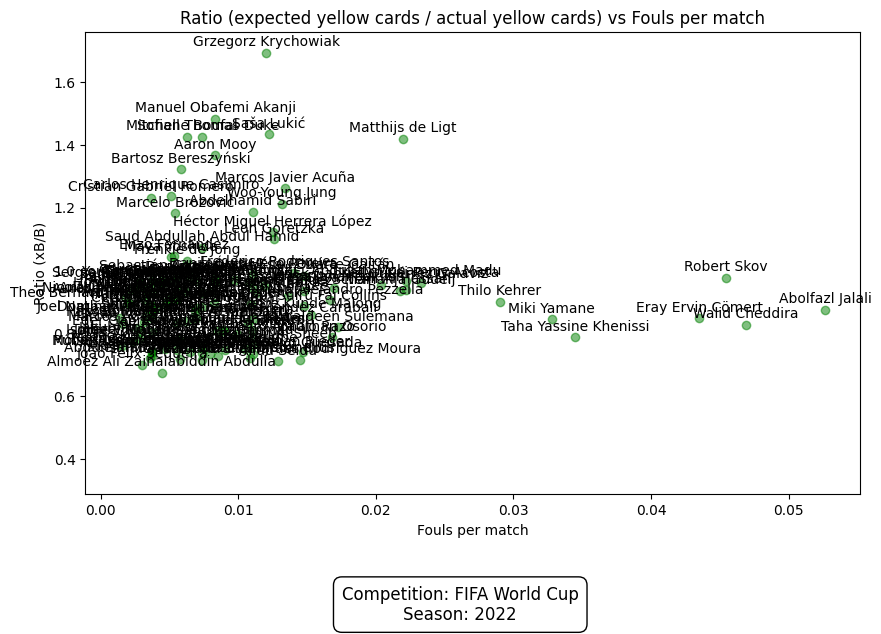

In [284]:
# Ratio Vs. Label Count Plot

# Extracting relevant columns
label_count = df_merged_minutes['label_count'] / df_merged_minutes['minutes_played']
ratio = df_merged_minutes['ratio']
player_names = df_merged_minutes.index.map(df_merged_minutes['player_first']).tolist()  # Map team IDs to country names
competition_name = df_merged_minutes['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df_merged_minutes['season_name_first'].iloc[0]

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_count, ratio, color='green', alpha=0.5)

# Adding a diagonal line
ax.plot([label_count.min(), label_count.max()], [ratio.min(), ratio.max()], linestyle='--', color='blue', label='Diagonal line')

# Annotating each point with the team name
for i, player_name in enumerate(player_names):
    ax.annotate(player_name, (label_count.iloc[i], ratio.iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Adding competition name and season name as captions
# caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox={'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round,pad=0.5'})

ax.set_title('Ratio (expected yellow cards / actual yellow cards) vs Fouls per match')
ax.set_xlabel('Fouls per match')
ax.set_ylabel('Ratio (xB/B)')
plt.show()


ValueError: x and y must be the same size

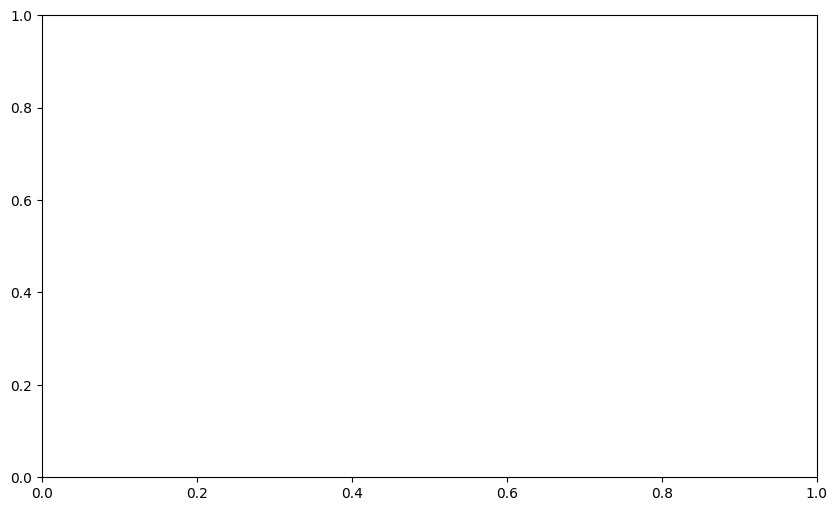

In [298]:
# Ratio Vs. Label Count Plot

# Extracting relevant columns
label_count = df_merged_minutes['label_count'] / df_merged_minutes['minutes_played']
ratio = df_merged_minutes['ratio']

# Check for inf and NaN values and handle them
label_count = label_count.replace([np.inf, -np.inf], np.nan).dropna()
ratio = ratio.replace([np.inf, -np.inf], np.nan).dropna()

player_names = df_merged_minutes.index.map(df_merged_minutes['player_first']).tolist()  # Map team IDs to country names
competition_name = df_merged_minutes['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df_merged_minutes['season_name_first'].iloc[0]

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_count, ratio, color='green', alpha=0.5)

# Adding a diagonal line
ax.plot([label_count.min(), label_count.max()], [ratio.min(), ratio.max()], linestyle='--', color='blue', label='Diagonal line')

# Annotating each point with the team name
# Calculate the density of the points
xy = np.vstack([label_count,ratio])
z = gaussian_kde(xy)(xy)

# Only annotate the points where the density is below a certain threshold
density_threshold = z.mean()  # Adjust this value based on your needs
for i, player_name in enumerate(player_names):
    if z[i] < density_threshold:
        ax.annotate(player_name, (label_count.iloc[i], ratio.iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Adding competition name and season name as captions
# caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox={'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round,pad=0.5'})

ax.set_title('Ratio (expected yellow cards / actual yellow cards) vs Fouls per match')
ax.set_xlabel('Fouls per match')
ax.set_ylabel('Ratio (xB/B)')
plt.show()


IndexError: list index out of range

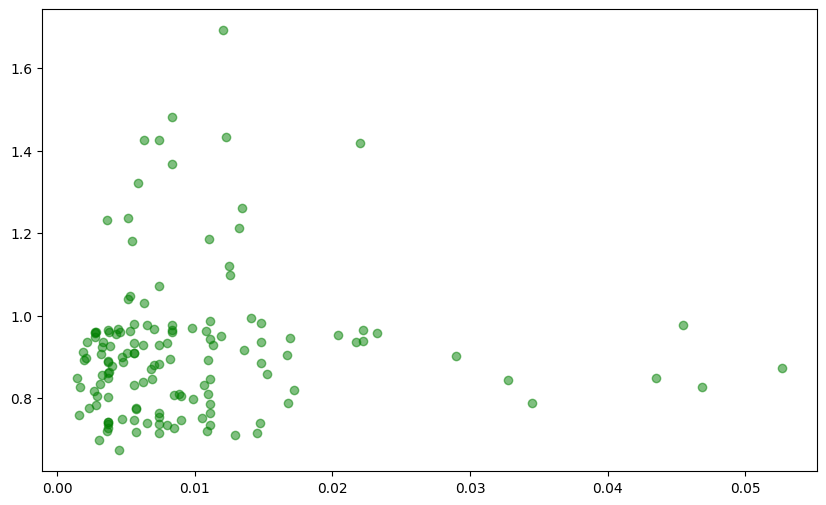

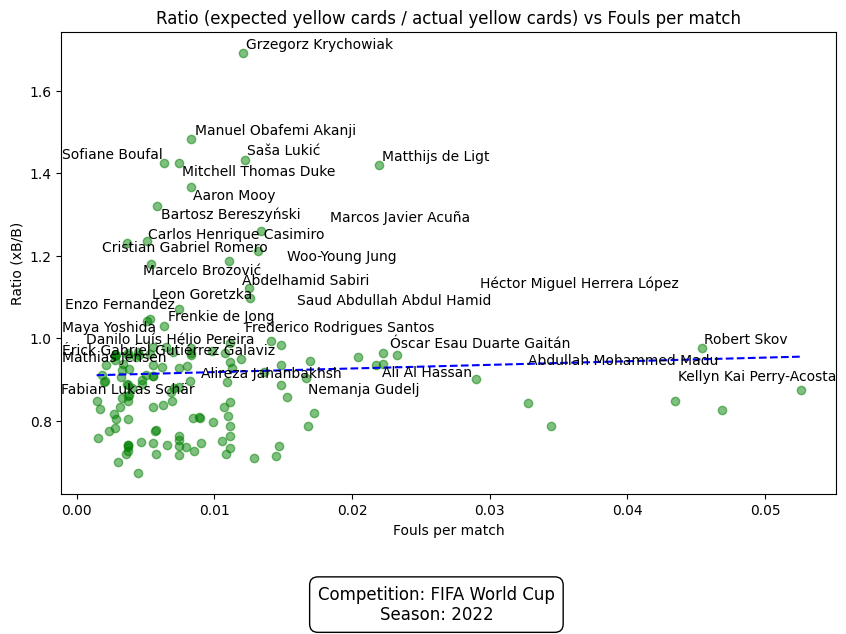

In [291]:
# Import the adjustText library
from adjustText import adjust_text

# Ratio Vs. Label Count Plot

# Extracting relevant columns
label_count = df_merged_minutes['label_count'] / df_merged_minutes['minutes_played']
ratio = df_merged_minutes['ratio']

# Check for inf and NaN values and handle them
mask = ~np.isinf(label_count) & ~np.isnan(label_count) & ~np.isinf(ratio) & ~np.isnan(ratio)
label_count = label_count[mask]
ratio = ratio[mask]

player_names = df_merged_minutes.index[mask].map(df_merged_minutes['player_first']).tolist()  # Map team IDs to country names
competition_name = df_merged_minutes['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df_merged_minutes['season_name_first'].iloc[0]

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_count, ratio, color='green', alpha=0.5)

# Calculate the best fit line
slope, intercept = np.polyfit(label_count, ratio, 1)
x = np.linspace(label_count.min(), label_count.max(), 100)
y = slope * x + intercept

# Adding the best fit line
ax.plot(x, y, linestyle='--', color='blue', label='Best fit line')

# Annotating each point with the team name
# Calculate the density of the points
xy = np.vstack([label_count,ratio])
z = gaussian_kde(xy)(xy)

# Only annotate the points where the density is below a certain threshold and further away from the origin
density_threshold = z.mean()  # Adjust this value based on your needs
distance_threshold = np.sqrt(label_count**2 + ratio**2).mean()  # Adjust this value based on your needs
texts = []
for i, player_name in enumerate(player_names):
    if z[i] < density_threshold and np.sqrt(label_count.iloc[i]**2 + ratio.iloc[i]**2) > distance_threshold:
        texts.append(ax.text(label_count.iloc[i], ratio.iloc[i], player_name))

# Use adjustText to reduce overlapping of text
adjust_text(texts)

# Adding competition name and season name as captions
# caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox={'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round,pad=0.5'})

ax.set_title('Ratio (expected yellow cards / actual yellow cards) vs Fouls per match')
ax.set_xlabel('Fouls per match')
ax.set_ylabel('Ratio (xB/B)')
plt.show()


IndexError: list index out of range

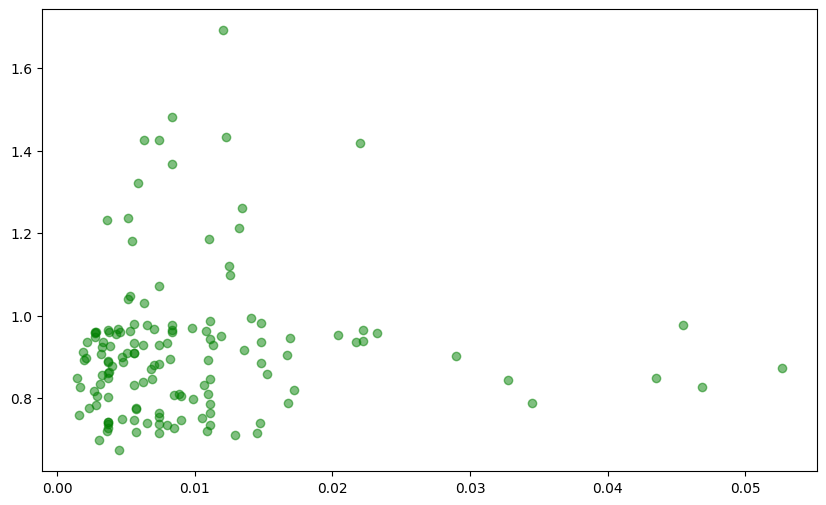

In [295]:
# Import the adjustText library
from adjustText import adjust_text

# Ratio Vs. Label Count Plot

# Extracting relevant columns
label_count = df_merged_minutes['label_count'] / df_merged_minutes['minutes_played']
ratio = df_merged_minutes['ratio']

# Check for inf and NaN values and handle them
mask = ~np.isinf(label_count) & ~np.isnan(label_count) & ~np.isinf(ratio) & ~np.isnan(ratio)
label_count = label_count[mask]
ratio = ratio[mask]

player_names = df_merged_minutes.index[mask].map(df_merged_minutes['player_first']).tolist()  # Map team IDs to country names
competition_name = df_merged_minutes['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df_merged_minutes['season_name_first'].iloc[0]

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_count, ratio, color='green', alpha=0.5)

# Annotating each point with the team name
# Calculate the density of the points
xy = np.vstack([label_count,ratio])
z = gaussian_kde(xy)(xy)

# Only annotate the points where the density is below a certain threshold and further away from the origin
density_threshold = z.mean()  # Adjust this value based on your needs
distance_threshold = np.sqrt(label_count**2 + ratio**2).mean()  # Adjust this value based on your needs
texts = []
for i, player_name in enumerate(player_names):
    if z[i] < density_threshold and np.sqrt(label_count.iloc[i]**2 + ratio.iloc[i]**2) > distance_threshold:
        if label_count.iloc[i] > 0.025 and ratio.iloc[i] > 1.1:  # New condition to filter out certain points
            texts.append(ax.text(label_count.iloc[i], ratio.iloc[i], player_name))

# Use adjustText to reduce overlapping of text
adjust_text(texts)

# Adding competition name and season name as captions
caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox={'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round,pad=0.5'})

ax.set_title('Ratio (expected yellow cards / actual yellow cards) vs Fouls per match')
ax.set_xlabel('Fouls per match')
ax.set_ylabel('Ratio (xB/B)')
plt.show()


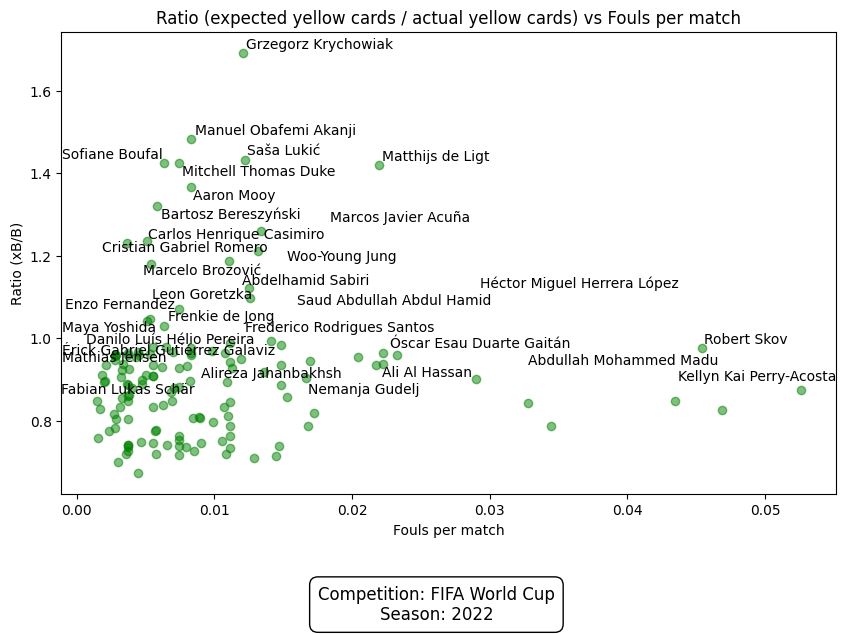

In [299]:
# Import the adjustText library
from adjustText import adjust_text

# Ratio Vs. Label Count Plot

# Extracting relevant columns
label_count = df_merged_minutes['label_count'] / df_merged_minutes['minutes_played']
ratio = df_merged_minutes['ratio']

# Check for inf and NaN values and handle them
mask = ~np.isinf(label_count) & ~np.isnan(label_count) & ~np.isinf(ratio) & ~np.isnan(ratio)
label_count = label_count[mask]
ratio = ratio[mask]

player_names = df_merged_minutes.index[mask].map(df_merged_minutes['player_first']).tolist()  # Map team IDs to country names
competition_name = df_merged_minutes['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df_merged_minutes['season_name_first'].iloc[0]

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_count, ratio, color='green', alpha=0.5)

# Adding a diagonal line
# ax.plot([label_count.min(), label_count.max()], [ratio.min(), ratio.max()], linestyle='--', color='blue', label='Diagonal line')

# Annotating each point with the team name
# Calculate the density of the points
xy = np.vstack([label_count,ratio])
z = gaussian_kde(xy)(xy)

# Only annotate the points where the density is below a certain threshold and further away from the origin
density_threshold = z.mean()  # Adjust this value based on your needs
distance_threshold = np.sqrt(label_count**2 + ratio**2).mean()  # Adjust this value based on your needs
texts = []
for i, player_name in enumerate(player_names):
    if z[i] < density_threshold and np.sqrt(label_count.iloc[i]**2 + ratio.iloc[i]**2) > distance_threshold:
        texts.append(ax.text(label_count.iloc[i], ratio.iloc[i], player_name))

# Use adjustText to reduce overlapping of text
adjust_text(texts)

# Adding competition name and season name as captions
# caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox={'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round,pad=0.5'})

ax.set_title('Ratio (expected yellow cards / actual yellow cards) vs Fouls per match')
ax.set_xlabel('Fouls per match')
ax.set_ylabel('Ratio (xB/B)')
plt.show()


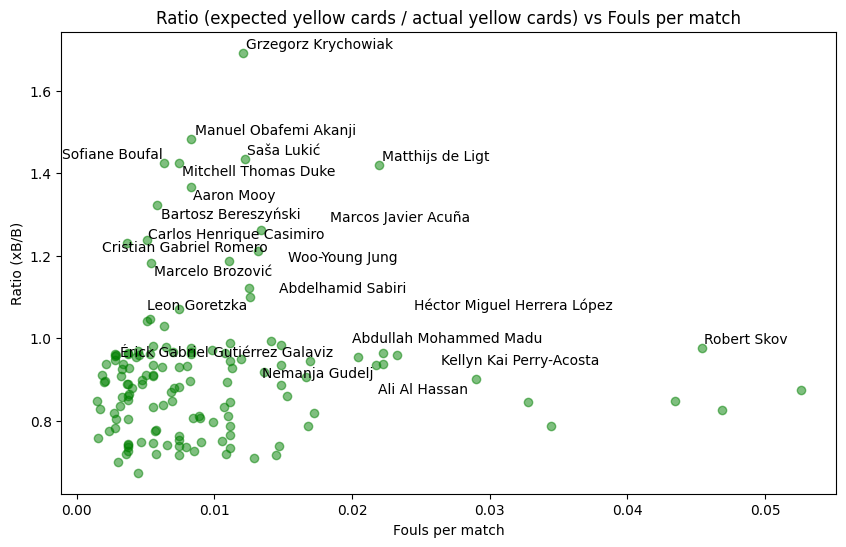

In [307]:
# Import the adjustText library
from adjustText import adjust_text

# Ratio Vs. Label Count Plot

# Extracting relevant columns
label_count = df_merged_minutes['label_count'] / df_merged_minutes['minutes_played']
ratio = df_merged_minutes['ratio']

# Check for inf and NaN values and handle them
mask = ~np.isinf(label_count) & ~np.isnan(label_count) & ~np.isinf(ratio) & ~np.isnan(ratio)
label_count = label_count[mask]
ratio = ratio[mask]

player_names = df_merged_minutes.index[mask].map(df_merged_minutes['player_first']).tolist()  # Map team IDs to country names
competition_name = df_merged_minutes['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df_merged_minutes['season_name_first'].iloc[0]

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_count, ratio, color='green', alpha=0.5)

# Adding a diagonal line
# ax.plot([label_count.min(), label_count.max()], [ratio.min(), ratio.max()], linestyle='--', color='blue', label='Diagonal line')

# Annotating each point with the team name
# Calculate the density of the points
xy = np.vstack([label_count,ratio])
z = gaussian_kde(xy)(xy)

# Only annotate the points where the density is below a certain threshold and further away from the origin
density_threshold = 0.4 * z.mean()  # Adjust this value based on your needs
distance_threshold = np.sqrt(label_count**2 + ratio**2).mean()  # Adjust this value based on your needs
texts = []
for i, player_name in enumerate(player_names):
    if z[i] < density_threshold and np.sqrt(label_count.iloc[i]**2 + ratio.iloc[i]**2) > distance_threshold:
        texts.append(ax.text(label_count.iloc[i], ratio.iloc[i], player_name))

# Use adjustText to reduce overlapping of text
adjust_text(texts)

# Adding competition name and season name as captions
# caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
# fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox={'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round,pad=0.5'})

ax.set_title('Ratio (expected yellow cards / actual yellow cards) vs Fouls per match')
ax.set_xlabel('Fouls per match')
ax.set_ylabel('Ratio (xB/B)')
plt.show()


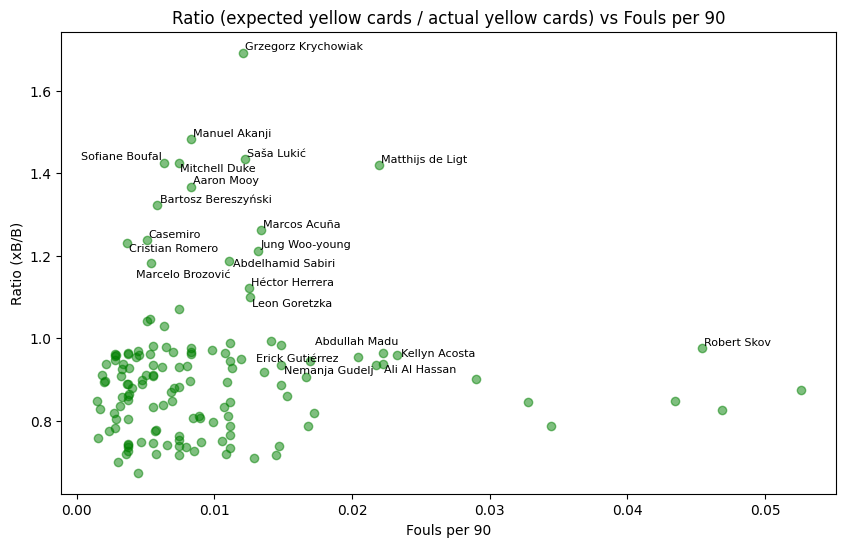

In [316]:
# Import the adjustText library
from adjustText import adjust_text

# Ratio Vs. Label Count Plot

# Extracting relevant columns
label_count = df_merged_minutes['label_count'] / df_merged_minutes['minutes_played']
ratio = df_merged_minutes['ratio']

# Check for inf and NaN values and handle them
mask = ~np.isinf(label_count) & ~np.isnan(label_count) & ~np.isinf(ratio) & ~np.isnan(ratio)
label_count = label_count[mask]
ratio = ratio[mask]

player_names = df_merged_minutes.index[mask].map(df_merged_minutes['player_first']).tolist()  # Map team IDs to country names
competition_name = df_merged_minutes['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df_merged_minutes['season_name_first'].iloc[0]

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_count, ratio, color='green', alpha=0.5)

# Adding a diagonal line
# ax.plot([label_count.min(), label_count.max()], [ratio.min(), ratio.max()], linestyle='--', color='blue', label='Diagonal line')

# Annotating each point with the team name
# Calculate the density of the points
xy = np.vstack([label_count,ratio])
z = gaussian_kde(xy)(xy)

# Only annotate the points where the density is below a certain threshold and further away from the origin
density_threshold = 0.4 * z.mean()  # Adjust this value based on your needs
distance_threshold = np.sqrt(label_count**2 + ratio**2).mean()  # Adjust this value based on your needs
texts = []
for i, player_name in enumerate(player_names):
    if z[i] < density_threshold and np.sqrt(label_count.iloc[i]**2 + ratio.iloc[i]**2) > distance_threshold:
        texts.append(ax.text(label_count.iloc[i], ratio.iloc[i], dict_player_mapping[player_name], fontsize=8))  # Adjust fontsize here

# Use adjustText to reduce overlapping of text
adjust_text(texts)

# Adding competition name and season name as captions
# caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
# fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox={'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round,pad=0.5'})

ax.set_title('Ratio (expected yellow cards / actual yellow cards) vs Fouls per 90')
ax.set_xlabel('Fouls per 90')
ax.set_ylabel('Ratio (xB/B)')
plt.show()


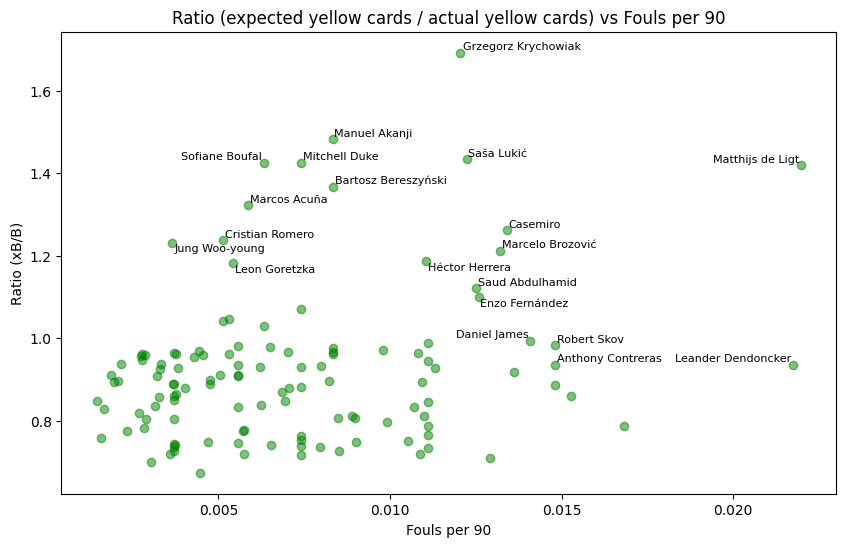

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from adjustText import adjust_text

# Assuming df_merged_minutes is the DataFrame containing the data

# Extracting relevant columns
label_count = df_merged_minutes['label_count'] / df_merged_minutes['minutes_played']
ratio = df_merged_minutes['ratio']

# Check for inf and NaN values and handle them
mask = ~np.isinf(label_count) & ~np.isnan(label_count) & ~np.isinf(ratio) & ~np.isnan(ratio)
label_count = label_count[mask]
ratio = ratio[mask]

player_names = df_merged_minutes.index[mask].map(df_merged_minutes['player_first']).tolist()  # Map team IDs to country names
competition_name = df_merged_minutes['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df_merged_minutes['season_name_first'].iloc[0]

# Filter out players who played less than 90 minutes
mask_90 = df_merged_minutes['minutes_played'] >= 90
label_count = label_count[mask_90]
ratio = ratio[mask_90]
player_names = [player_name for player_name, mask in zip(player_names, mask_90) if mask]

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_count, ratio, color='green', alpha=0.5)

# Annotating each point with the player name
# Calculate the density of the points
xy = np.vstack([label_count, ratio])
z = gaussian_kde(xy)(xy)

# Only annotate the points where the density is below a certain threshold and further away from the origin
density_threshold = 0.4 * z.mean()  # Adjust this value based on your needs
distance_threshold = np.sqrt(label_count**2 + ratio**2).mean()  # Adjust this value based on your needs
texts = []
for i, player_name in enumerate(player_names):
    if z[i] < density_threshold and np.sqrt(label_count.iloc[i]**2 + ratio.iloc[i]**2) > distance_threshold:
        texts.append(ax.text(label_count.iloc[i], ratio.iloc[i], dict_player_mapping[player_name], fontsize=8))  # Adjust fontsize here

# Use adjustText to reduce overlapping of text
adjust_text(texts)

# Adding competition name and season name as captions
#caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
#fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox={'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round,pad=0.5'})

ax.set_title('Ratio (expected yellow cards / actual yellow cards) vs Fouls per 90')
ax.set_xlabel('Fouls per 90')
ax.set_ylabel('Ratio (xB/B)')
plt.show()